In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Датасет

In [2]:
df = pd.read_csv('water_potability_.csv')

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


# Гипотеза о равенстве средних для ph

In [4]:
x = df[df['Potability'] == 1]['ph']
y = df[df['Potability'] == 0]['ph']
x.name, y.name = 'potable', 'not potable'

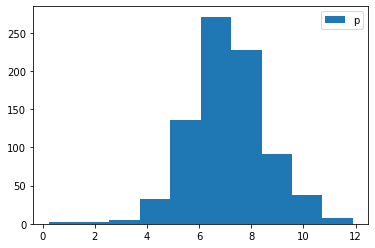

In [5]:
#ph при potability == 1
plt.hist(x)
plt.legend(x.name)

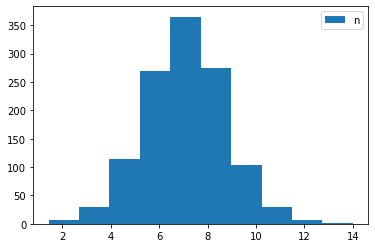

In [6]:
#ph при potability == 0
plt.hist(y)
plt.legend(y.name)

Проверяем на нормальность

In [7]:
res_x = stats.shapiro(x)
res_y = stats.shapiro(y)
print('p-value для первой выборки: ', res_x[1])
print('p-value для второй выборки: ', res_y[1])

p-value для первой выборки:  4.416465799295111e-06
p-value для второй выборки:  0.20297732949256897


При уровне значимости 0.05 получаем, что выборка с potability==1 не нормального распределения.

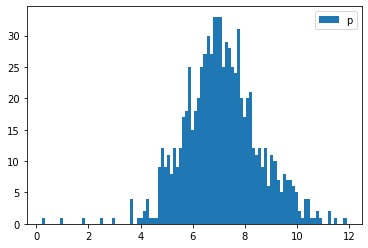

In [8]:
#ph при potability == 1
plt.hist(x, bins=100)
plt.legend(x.name)

Критерий Стьдента применить не можем, применим критерий Манна-Уитни

In [9]:
res = stats.mannwhitneyu(x,y)
print('p-value: ', res[1])

p-value:  0.5296719786634061


Гипотезу о равенстве средних принимаем 

# Гипотеза о равенстве средних для Turbidity

In [10]:
x = df[df['Potability'] == 1]['Turbidity']
y = df[df['Potability'] == 0]['Turbidity']
x.name, y.name = 'potable', 'not potable'

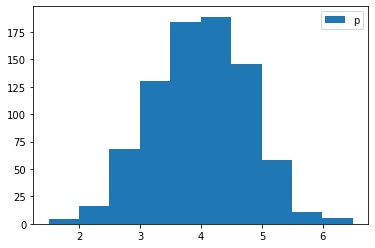

In [11]:
#Распределение Turbidity для potability == 1
plt.hist(x)
plt.legend(x.name)

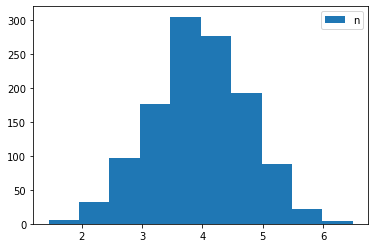

In [12]:
#Распределение Turbidity для potability == 0
plt.hist(y)
plt.legend(y.name)

In [13]:
#нормальность
res_x = stats.shapiro(x)
res_y = stats.shapiro(y)
print('p-value для первой выборки: ', res_x[1])
print('p-value для второй выборки: ', res_y[1])

p-value для первой выборки:  0.8450984954833984
p-value для второй выборки:  0.8997399806976318


При уровне значимости 0.05 получаем, что выборки имеют нормальное распределение

In [14]:
# Критерий Флигнера однородности дисперсий
res = stats.fligner(x,y)
print('p-value: ', res[1])

p-value:  0.8900761703462692


Дисперсии равны

In [15]:
# Критерий Стьюдента для проверки равенства средних при одинаковой дисперсии
res = stats.ttest_ind(x,y, equal_var=True)
print('p-value: ', res[1])

p-value:  0.30930963202416595


Средние равны

# Коэффициент корреляции Спирмена

In [30]:
sp = stats.spearmanr(df['ph'], df['Potability'])
print('correlation: ', sp[0])
print('p-value: ', sp[1])

correlation:  0.014019709471769198
p-value:  0.5297797418282144


Наличие положительной корреляции между значением ph и potability, но из значения p-value делаем вывод, что корреляция не является статистически значимой

In [22]:
sp = stats.spearmanr(df['Turbidity'], df['Potability'])
print('correlation: ', sp[0])
print('p-value: ', sp[1])

correlation:  0.022441313504941805
p-value:  0.31448141304021615


Наличие положительной корреляции между значением Turbidity и Potability, но из значения p-value делаем вывод, что корреляция не является статистически значимой

# Коэффициент корреляции Пирсона

In [32]:
pears = stats.pearsonr(df['ph'], df['Potability'])
print('correlation: ', pears[0])
print('p-value: ', pears[1])

correlation:  0.014530037037528127
p-value:  0.5149065707818627


Тот же вывод

In [33]:
pears = stats.pearsonr(df['Turbidity'], df['Potability'])
print('correlation: ', pears[0])
print('p-value: ', pears[1])

correlation:  0.02268239641344312
p-value:  0.3093096320245413


Аналогично